<a href="https://colab.research.google.com/github/OmamaRawahi/O-M/blob/main/DP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Privacy
## In-Class Exercises

In [3]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

adult = pd.read_csv('https://github.com/jnear/cs211-data-privacy/raw/master/homework/adult_with_pii.csv')

<ipython-input-3-ba7ab36c57c3>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
adult

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Ardyce Golby,10/29/1961,212-61-8338,41328,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Jean O'Connor,6/28/1952,737-32-2919,94735,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Reuben Skrzynski,8/9/1966,314-48-0219,49628,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Caye Biddle,5/19/1978,647-75-3550,8213,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Question 1

Write a *counting query* to determine whether or not Karrie Trusslove's age is 39.

In [4]:
# YOUR CODE HERE
def karrie_query():
 count= adult[(adult['Name']=='Karrie Trusslove')& (adult['Age']==39)].shape[0]
 return count

In [5]:
# TEST CASE

assert karrie_query() == 1



```
# This is formatted as code
```

## Question 2

Add Laplace noise to the counting query you wrote in the last question to ensure differential privacy for $\epsilon = 1.0$.

In [18]:
def dp_karrie_query():
    count = karrie_query()
    return count + np.random.laplace(loc=0, scale=1/epsilon)

# Assuming epsilon is defined somewhere in your code
epsilon = 1.0

In [19]:
# TEST CASE

q2_runs = [dp_karrie_query() for _ in range(100)]
noise_runs = [np.random.laplace(loc=1, scale=1/epsilon) for _ in range(100)]

assert stats.wasserstein_distance(q2_runs, noise_runs) < 1

## Question 3

In 2-4 sentences, describe how `dp_karrie_query` protects Karrie's privacy.

addition of noise ensures that the exact count is obscured, making it challenging for an outsider to determine if karrie's specific data present in the dataset...

YOUR ANSWER HERE

## Question 4

Implement a function to construct an *empirical distribution* over random samples from the Laplace distribution with location 0 and scale `scale`. Use 1000 samples.

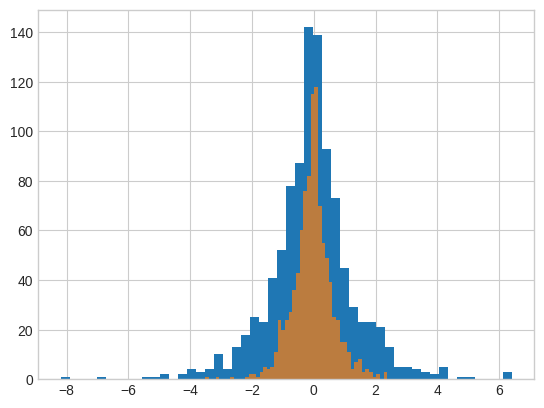

In [24]:
def empirical_dist_lap(scale, num_samples=1000):
    return np.random.laplace(loc=0, scale=scale, size=num_samples)


epsilon1 = 1.0
epsilon2 = 2.0

plt.hist(empirical_dist_lap(1/epsilon1), bins=50);
plt.hist(empirical_dist_lap(1/epsilon2), bins=50, alpha=.7);

In [26]:
# PLACEHOLDER for test cases

samples_1 = empirical_dist_lap(1/epsilon1, num_samples=1000)
samples_2 = empirical_dist_lap(1/epsilon2, num_samples=1000)

assert np.isclose(np.mean(samples_1), 0, atol=0.1)  # Mean should be close to 0
assert np.isclose(np.mean(samples_2), 0, atol=0.1)

In [27]:
np.exp(1)

2.718281828459045

-9.880977549283179 10.0 3.0 3.3333333333333335
-7.872515564055605 135.0 45.0 3.0
-5.864053578828031 918.0 362.0 2.5359116022099446
-3.8555915936004572 6775.0 2585.0 2.620889748549323
-1.8471296083728834 49672.0 18670.0 2.660524906266738
0.16133237685468949 36812.0 62986.0 0.5844473375035723
2.169794362082264 4896.0 13297.0 0.3682033541400316
4.178256347309839 669.0 1799.0 0.3718732629238466
6.186718332537412 99.0 217.0 0.45622119815668205
8.195180317764985 14.0 29.0 0.4827586206896552


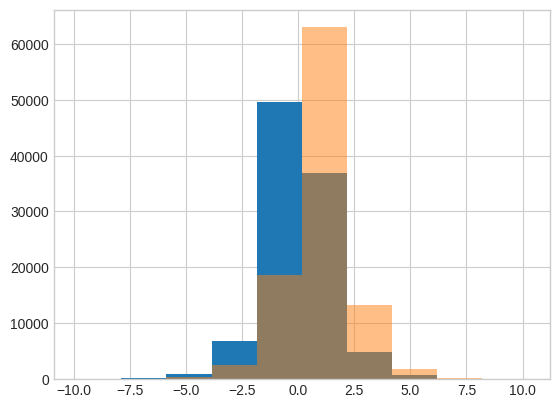

In [28]:
counts1, bins, _ = plt.hist([np.random.laplace(loc=0, scale=1/1) for _ in range(100000)], bins=10)
counts2, _, _ = plt.hist([np.random.laplace(loc=1, scale=1/1) for _ in range(100000)], bins=bins, alpha=.5)
list(zip(bins, counts1, counts2))

for bin_val, count1, count2 in zip(bins,counts1,counts2):
    print(bin_val, count1, count2, count1 / count2)

## Question 5

Consider the program below.

In [29]:
counting_query = lambda: 1

result_1 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)
result_2 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon2)
result_3 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)

print(result_1, result_2, result_3)

0.6611716470304083 1.7827069214824196 -1.354887733421656


Write a function `total_epsilon` that returns the total privacy cost for this program.

In [31]:
def total_epsilon():
    # Laplace scales for each noise addition
    laplace_scales = [1/epsilon1, 1/epsilon2, 1/epsilon1]

    # Calculate the total privacy cost
    total_cost = max(laplace_scales)

    return total_cost
#note: the total privacy cost is based on the most privacy-sensitive Laplace noise addition in the program.




1.0


In [38]:
# Placeholder for test case
epsilon1 = 1
epsilon2 = 2


# Update the values of epsilon1 and epsilon2 as needed for testing

total_epsilon()



1.0